In [315]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer
from sklearn.model_selection import cross_validate, train_test_split, learning_curve
from sklearn.metrics import mean_squared_error

from xgboost import XGBRegressor

In [316]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, median_absolute_error

def adjustedR2(r2,n,k):
    return r2-(k-1)/(n-k)*(1-r2)

def metrics_scores(y, y_pred):
    print('MSE test : ' + str(mean_squared_error(y, y_pred)))
    print('RMSE test : ' + str(np.sqrt(mean_squared_error(y, y_pred))))
    print('MAE test : ' + str(mean_absolute_error(y, y_pred)))
    print('MdAE test : ' + str(median_absolute_error(y, y_pred)))

def metrics_scores_train(y, y_pred):
    print('MSE train : ' + str(mean_squared_error(y, y_pred)))
    print('RMSE train : ' + str(np.sqrt(mean_squared_error(y, y_pred))))
    print('MAE train : ' + str(mean_absolute_error(y, y_pred)))
    print('MdAE testraint : ' + str(median_absolute_error(y, y_pred)))

# Fit registered

In [195]:
df_train_modify = pd.read_csv('../../csv/train_modifie.csv')
df_test_modify = pd.read_csv('../../csv/test_modifie.csv')

df_train = df_train_modify.drop(['day_length'], axis=1)
df_test = df_test_modify.drop(['day_length'], axis=1)

In [196]:
X_train = df_train.drop(['registered', 'casual'], axis=1)
y_train_registered = df_train['registered']
y_train_casual = df_train['casual']

X_test = df_test.drop(['registered', 'casual'], axis=1)
y_test_registered = df_test['registered']
y_test_casual = df_test['casual']

In [197]:
X_train, _, y_train_registered, _ = train_test_split(X_train, y_train_registered, test_size=0.00001)

In [198]:
encoded_features = ['season', 'weather', 'week_days', 'months']
encoded_pipeline = make_pipeline(OneHotEncoder())

scaled_features = ['temp', 'atemp', 'windspeed', 'humidity', 'hours','years']#, 'day_length'
scaled_pipeline = make_pipeline(StandardScaler())

preprocessor = make_column_transformer((encoded_pipeline, encoded_features), (scaled_pipeline, scaled_features), remainder="passthrough")
xgb = XGBRegressor(n_estimators=125, max_depth=7, subsample=0.8, learning_rate=0.1,
                   colsample_bytree=0.9, colsample_bylevel=1, colsample_bynode=1, gamma=0)

model_registered = make_pipeline(preprocessor, xgb)

In [ ]:
metrics = ['r2','neg_mean_squared_error', 'neg_root_mean_squared_error', 'neg_mean_absolute_error',
        'neg_median_absolute_error']#, 'neg_mean_squared_log_error'
scores = cross_validate(model_registered,X_train,y_train_registered,cv=5,scoring=metrics)

print(scores['test_r2'])
r2 = (scores['test_r2']).mean()
r2_adj = adjustedR2(r2,X_train.shape[0],X_train.shape[1])
mse = (-scores['test_neg_mean_squared_error']).mean()
rmse = (-scores['test_neg_root_mean_squared_error']).mean()
mae = (-scores['test_neg_mean_absolute_error']).mean()
mdae = (-scores['test_neg_median_absolute_error']).mean()

print('r2 : ' + str(r2))
print('r2 adj. : ' + str(r2_adj))
print('MSE : ' + str(mse))
print('RMSE : ' + str(rmse))
print('MAE : ' + str(mae))
print('MdAE : ' + str(mdae))

In [200]:
model_registered.fit(X_train,y_train_registered)
model_registered.predict(X_test)
model_registered.score(X_test,y_test_registered)

0.8625456775900576

# Fit casual

In [267]:
df_train_modify = pd.read_csv('../../csv/train_modifie.csv')
df_test_modify = pd.read_csv('../../csv/test_modifie.csv')

df_train = df_train_modify.drop(['day_length'], axis=1)
df_test = df_test_modify.drop(['day_length'], axis=1)

In [268]:
X_train = df_train.drop(['registered', 'casual'], axis=1)
y_train_registered = df_train['registered']
y_train_casual = df_train['casual']

X_test = df_test.drop(['registered', 'casual'], axis=1)
y_test_registered = df_test['registered']
y_test_casual = df_test['casual']

In [269]:
X_train, _, y_train_casual, _ = train_test_split(X_train, y_train_casual, test_size=0.00001)

In [270]:
encoded_features = ['season', 'weather', 'week_days', 'months']
encoded_pipeline = make_pipeline(OneHotEncoder())

scaled_features = ['temp', 'atemp', 'windspeed', 'humidity', 'hours','years']#, 'day_length'
scaled_pipeline = make_pipeline(StandardScaler())

preprocessor = make_column_transformer((encoded_pipeline, encoded_features), (scaled_pipeline, scaled_features), remainder="passthrough")
xgb = XGBRegressor(n_estimators=140, max_depth=7, subsample=0.9, learning_rate=0.1,
          colsample_bytree=0.9, colsample_bylevel=0.8, colsample_bynode=0.9, gamma=0.1)

model_casual = make_pipeline(preprocessor, xgb)

In [ ]:
metrics = ['r2','neg_mean_squared_error', 'neg_root_mean_squared_error', 'neg_mean_absolute_error',
        'neg_median_absolute_error']#, 'neg_mean_squared_log_error'
scores = cross_validate(model_casual,X_train,y_train_casual,cv=5,scoring=metrics)

print(scores['test_r2'])
r2 = (scores['test_r2']).mean()
r2_adj = adjustedR2(r2,X_train.shape[0],X_train.shape[1])
mse = (-scores['test_neg_mean_squared_error']).mean()
rmse = (-scores['test_neg_root_mean_squared_error']).mean()
mae = (-scores['test_neg_mean_absolute_error']).mean()
mdae = (-scores['test_neg_median_absolute_error']).mean()

print('r2 : ' + str(r2))
print('r2 adj. : ' + str(r2_adj))
print('MSE : ' + str(mse))
print('RMSE : ' + str(rmse))
print('MAE : ' + str(mae))
print('MdAE : ' + str(mdae))

In [272]:
model_casual.fit(X_train,y_train_casual)
model_casual.predict(X_test)
model_casual.score(X_test,y_test_casual)

0.867591826300233

# Fit casual (en séparant le onehotencodage)

In [277]:
df_train_modify = pd.read_csv('../../csv/train_modifie.csv')
df_test_modify = pd.read_csv('../../csv/test_modifie.csv')

df_train = df_train_modify.drop(['day_length'], axis=1)
df_test = df_test_modify.drop(['day_length'], axis=1)

In [278]:
X_train = df_train.drop(['registered', 'casual'], axis=1)
y_train_registered = df_train['registered']
y_train_casual = df_train['casual']

X_test = df_test.drop(['registered', 'casual'], axis=1)
y_test_registered = df_test['registered']
y_test_casual = df_test['casual']

In [279]:
X_train, _, y_train_casual, _ = train_test_split(X_train, y_train_casual, test_size=0.00001)

In [280]:
encoded_features = ['season', 'weather', 'week_days', 'months']
ohe = make_column_transformer((OneHotEncoder(),encoded_features), remainder='passthrough')
ohe.fit(X_train)
X_train_ohe = ohe.transform(X_train)
X_train = pd.DataFrame(X_train_ohe)

X_test_ohe = ohe.transform(X_test)
X_test = pd.DataFrame(X_test_ohe)


features_name = {}
for i in range(X_train.shape[1]):
    features_name[i] = ohe.get_feature_names_out()[i].replace("onehotencoder__","").replace("remainder__","")
X_train = X_train.rename(columns=features_name)
X_test = X_test.rename(columns=features_name)


scaled_features = ['temp', 'atemp', 'windspeed', 'humidity', 'hours','years']#, 'day_length'
scaled_pipeline = make_pipeline(StandardScaler())

preprocessor = make_column_transformer((scaled_pipeline, scaled_features), remainder="passthrough")
xgb = XGBRegressor(n_estimators=140, max_depth=7, subsample=0.9, learning_rate=0.1,
          colsample_bytree=0.9, colsample_bylevel=0.8, colsample_bynode=0.9, gamma=0.1)
model_casual = make_pipeline(preprocessor, xgb)

In [ ]:
metrics = ['r2','neg_mean_squared_error', 'neg_root_mean_squared_error', 'neg_mean_absolute_error',
        'neg_median_absolute_error']#, 'neg_mean_squared_log_error'
scores = cross_validate(model_casual,X_train,y_train_casual,cv=5,scoring=metrics)

print(scores['test_r2'])
r2 = (scores['test_r2']).mean()
r2_adj = adjustedR2(r2,X_train.shape[0],X_train.shape[1])
mse = (-scores['test_neg_mean_squared_error']).mean()
rmse = (-scores['test_neg_root_mean_squared_error']).mean()
mae = (-scores['test_neg_mean_absolute_error']).mean()
mdae = (-scores['test_neg_median_absolute_error']).mean()

print('r2 : ' + str(r2))
print('r2 adj. : ' + str(r2_adj))
print('MSE : ' + str(mse))
print('RMSE : ' + str(rmse))
print('MAE : ' + str(mae))
print('MdAE : ' + str(mdae))

In [282]:
model_casual.fit(X_train,y_train_casual)
model_casual.predict(X_test)
model_casual.score(X_test,y_test_casual)

0.8661104126058362

# Fonctions pour charger données API et les mettre en forme

In [387]:
from datetime import datetime
import json
import requests

api_key = '162a9846bb68bd69f226b05f204e6404'
lat = 50.62925
long = 3.057256

def load_dataAPI(lat, long, api_key):
     url = 'https://api.openweathermap.org/data/2.5/onecall?lat={}&lon={}&appid={}'.format(lat, long, api_key)
     req = requests.get(url)
     req = req.content.decode("utf-8")
     return json.loads(req)

def get_48h_data(dataAPI, feature_names):
    dataAPI = [dataAPI[i] for i in range(len(dataAPI))]
    data = []
    for dict in dataAPI:
        data.append(data_formatting(dict, feature_names))
    return f'{data}'

def get_encoded_features_name(data, features_to_encode):
    data = data.drop(['casual', 'registered'], axis=1)
    ohe = make_column_transformer((OneHotEncoder(), features_to_encode), remainder='passthrough')
    ohe.fit(data)
    data_ohe = ohe.transform(data)
    data = pd.DataFrame(data_ohe)
    # On récupère le nom des colonnes après avoir OneHotEncodé
    features_name = {}
    for i in range(data.shape[1]):
        features_name[i] = ohe.get_feature_names_out()[i].replace("onehotencoder__","").replace("remainder__","")
    data = data.rename(columns=features_name)
    return data.columns

def data_formatting(data_1h_API, feature_names):
    # keys correspond aux clés du dataset après onehotencodage

    # On extrait les données nécessaires pour la prédiction
    timestamp = data_1h_API['dt']
    data_1h_API['dt'] = datetime.fromtimestamp(data_1h_API['dt'])
    data_1h_API['weather'] = data_1h_API['weather'][0]['id']

    # Reformatage des données issues de l'API en une forme qui nous convient
    keys = ['dt', 'temp', 'feels_like', 'humidity', 'wind_speed', 'weather']
    new_keys = ['dt', 'temp', 'atemp', 'humidity', 'windspeed', 'weather']
    data = {}
    for key, new_key in zip(keys, new_keys):
        data[new_key] = data_1h_API[key]
    data['temp'] = round(data['temp'] - 273.15, 2)
    data['atemp'] = round(data['atemp'] - 273.15, 2)

    # Création d'un dictionnaire avec les clés correspondant aux noms des features utilisées
    # lors de la modélisation donc encodées.
    data_1h_dict = {}
    for name in feature_names:
        data_1h_dict[name] = 0

    for key in data.keys():
        data_1h_dict[key] = data[key]

    data_1h_dict = get_weather(data_1h_dict)

    data_1h_dict['hours'] = data_1h_dict['dt'].hour
    data_1h_dict['years'] = data_1h_dict['dt'].year
    data_1h_dict = get_months(data_1h_dict)
    data_1h_dict, weekday = get_week_day(data_1h_dict, timestamp)

    data_1h_dict = get_season(data_1h_dict)
    data_1h_dict = get_workingday(data_1h_dict, weekday)
    data_1h_dict['dt'] = data_1h_dict['dt'].strftime("%A, %Y-%m-%d, %H:%M:%S")

    return data_1h_dict

def feels_like_temperature(temp,humidity):
    # Heat index (indice de chaleur) ; en degré celsius
    c1 = -8.78469475556
    c2 = 1.61139411
    c3 = 2.33854883889
    c4 = -0.14611605
    c5 = -0.012308094
    c6 = -0.0164248277778
    c7 = 2.211732e-3
    c8 = 7.2546e-4
    c9 = 3.582e-6
    T = temp
    R = humidity
    if (humidity > 40) & (temp > 27):
        return c1 + c2*T + c3*R + c4*T*R + c5*pow(T,2) + c6*pow(R,2) + c7*pow(T,2)*R + c8*T*pow(R,2) + c9*pow(T,2)*pow(R,2)
    else:
        return temp

def get_weather(data_1h_dict):
    weather_1 = [800, 801, 802]
    weather_2 = [701, 711, 721, 803, 804]
    weather_3 = [200, 201, 300, 301, 310, 500, 501, 520,
                 600, 601, 611, 612, 615, 620, 731, 741, 751]
    weather_4 = [202, 210, 211, 212, 221, 230, 231, 232,
                 301, 302, 311, 312, 313, 314, 321, 502,
                 503, 504, 511, 520, 521, 522, 531, 602,
                 613, 616, 621, 622, 761, 762, 771, 781]
    weathers = [weather_1, weather_2, weather_3, weather_4]
    weather_labels = ['weather_1', 'weather_2', 'weather_3', 'weather_4']
    for i, weather in enumerate(weathers):
        if data_1h_dict['weather'] in weather:
            data_1h_dict[weather_labels[i]] = 1
    data_1h_dict.pop('weather')
    return data_1h_dict

def get_season(data_1h_dict):
    seasons = ['06-21', '09-21', '12-21']
    for i, season in enumerate(seasons):
        if (data_1h_dict['dt'].strftime('%m-%d') < '03-21'):
            data_1h_dict['season_4'] = 1
            return data_1h_dict
        if ((data_1h_dict['dt'].strftime('%m-%d') < season) & (data_1h_dict['dt'].strftime('%m-%d') >= '03-21')):
            data_1h_dict['season_' + str(i+1)] = 1
            return data_1h_dict

def get_months(data_1h_dict):
    month = data_1h_dict['dt'].month
    month_label = 'months_' + str(month)
    data_1h_dict[month_label] = 1
    return data_1h_dict

def get_week_day(data_1h_dict, timestamp):
    weekday = datetime.fromtimestamp(timestamp).weekday()+1
    weekday_label = 'week_days_' + str(weekday)
    data_1h_dict[weekday_label] = 1
    return data_1h_dict, weekday

def get_workingday(data_1h_dict, weekday):
    if (weekday >= 6):
        data_1h_dict['workingday'] = 0
    else:
        data_1h_dict['workingday'] = 1
    return data_1h_dict


# Fit des données de l'API

In [388]:
df_train_modify = pd.read_csv('../../csv/train_modifie.csv')
df_train = df_train_modify.drop(['day_length'], axis=1)

In [389]:
df_train.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,day_light,months,hours,years,week_days
0,4,0,0,1,9.84,14.395,81,0.0,3,13,0,1,0,2011,6
1,4,0,0,1,9.02,13.635,80,0.0,8,32,0,1,1,2011,6
2,4,0,0,1,9.02,13.635,80,0.0,5,27,0,1,2,2011,6
3,4,0,0,1,9.84,14.395,75,0.0,3,10,0,1,3,2011,6
4,4,0,0,1,9.84,14.395,75,0.0,0,1,0,1,4,2011,6


In [390]:
X_train = df_train.drop(['registered', 'casual'], axis=1)
y_train_registered = df_train['registered']
y_train_casual = df_train['casual']

#### On sépare l'étape de onehot encodage de la normalisation

In [391]:
encoded_features = ['season', 'weather', 'week_days', 'months']
ohe = make_column_transformer((OneHotEncoder(),encoded_features), remainder='passthrough')
ohe.fit(X_train)
X_train_ohe = ohe.transform(X_train)
X_train = pd.DataFrame(X_train_ohe)

features_name = {}
for i in range(X_train.shape[1]):
    features_name[i] = ohe.get_feature_names_out()[i].replace("onehotencoder__","").replace("remainder__","")
X_train = X_train.rename(columns=features_name)



scaled_features = ['temp', 'atemp', 'windspeed', 'humidity', 'hours','years']#, 'day_length'
scaled_pipeline = make_pipeline(StandardScaler())

preprocessor = make_column_transformer((scaled_pipeline, scaled_features), remainder="passthrough")
xgb = XGBRegressor(n_estimators=140, max_depth=7, subsample=0.9, learning_rate=0.1,
                   colsample_bytree=0.9, colsample_bylevel=0.8, colsample_bynode=0.9, gamma=0.1)
model_casual = make_pipeline(preprocessor, xgb)

In [392]:
results = model_casual.fit(X_train,y_train_casual)

In [402]:
features_to_encode = ['season', 'weather', 'week_days', 'months']
feature_names = get_encoded_features_name(df_train, features_to_encode)
dataAPI = dataAPI = load_dataAPI(lat, long, api_key)

data = get_48h_data(dataAPI['hourly'], feature_names)

In [395]:
data = pd.DataFrame(eval(data))
pred_casual = list(model_casual.predict(data))

pred_casual = pd.DataFrame(pred_casual)
pred_casual = pred_casual.rename(columns={0: 'prediction'})
data = data['hours'].reset_index()

In [403]:
data = pd.DataFrame(eval(data))
data = data.reset_index()

In [407]:
pd.set_option('display.max_columns',None)
data[(data['index'] >= 12) & (data['index'] <= 14)]

,index,season_1,season_2,season_3,season_4,weather_1,weather_2,weather_3,weather_4,week_days_1,week_days_2,week_days_3,week_days_4,week_days_5,week_days_6,week_days_7,months_1,months_2,months_3,months_4,months_5,months_6,months_7,months_8,months_9,months_10,months_11,months_12,holiday,workingday,temp,atemp,humidity,windspeed,day_light,hours,years,dt
12,12,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,9.96,7.20,95,5.97,0,3,2022,"Tuesday, 2022-04-05, 03:00:00"
13,13,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,9.99,7.24,95,5.98,0,4,2022,"Tuesday, 2022-04-05, 04:00:00"
14,14,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,9.79,7.00,94,5.93,0,5,2022,"Tuesday, 2022-04-05, 05:00:00"


<AxesSubplot:xlabel='index', ylabel='prediction'>

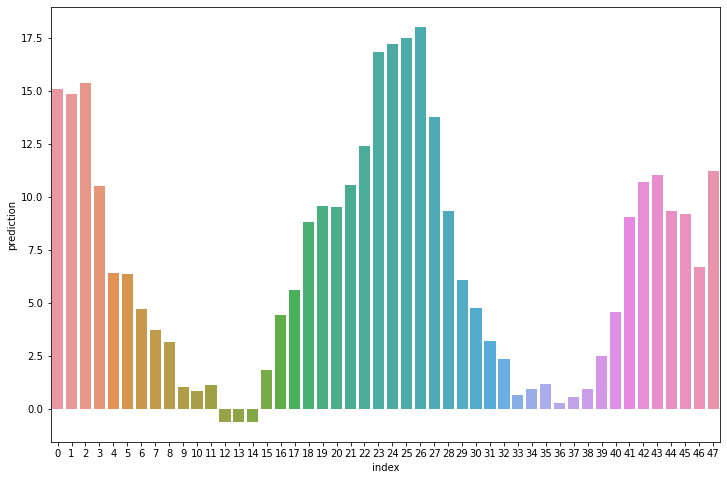

In [396]:
plt.figure(figsize=(12,8))
sns.barplot(x='index',y='prediction',data=data[['index']].join(pred_casual))